# Import autoreload

In [7]:
# auto reload a buit in fucntion 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing python codes

In [8]:
import data_cleaning as dc
import hypothesis_tests as ht
import visualizations as vz

In [ ]:
# !pytest -v -m cleaning

In [9]:
cleaned_data = dc.full_clean()
print(cleaned_data.shape)
cleaned_data.columns

(20482, 12)


Index(['charge', 'color', 'commercial_license', 'commercial_vehicle',
       'driver_city', 'hazmat', 'make', 'model', 'seq_id', 'vehicle_type',
       'violation_type', 'year'],
      dtype='object')

In [10]:
# add column and pull out information that are used in the hypothesis test
cleaned_data['ticket'] = cleaned_data['violation_type'].apply(lambda x: 1 if x == 'Citation' else 0)
short_cleaned_data = cleaned_data[['color','make','model','violation_type','year','ticket']]
short_cleaned_data.columns

Index(['color', 'make', 'model', 'violation_type', 'year', 'ticket'], dtype='object')

## Data visualization 

In [ ]:
# white vs red cars comparison
wr_chart = vz.create_sample_dists(cleaned_data,
                                         y_var='ticket', 
                                         x_var='color',
                                         categories=['WHITE','RED'])
print(len(wr_chart))
vz.overlapping_density('sns',
                       input_vars=wr_chart,
                       categories=['WHITE','RED'])

In [ ]:
# white vs blue cars comparison
wb_chart = vz.create_sample_dists(cleaned_data,
                                         y_var='ticket', 
                                         x_var='color',
                                         categories=['WHITE','BLUE'])
print(len(wr_chart))
vz.overlapping_density('sns',
                       input_vars=wr_chart,
                       categories=['WHITE','BLUE'], output_image_name='white_vs_blue')

In [ ]:
vizualization = vz.create_sample_dists(short_cleaned_data,
                    y_var='ticket', 
                    x_var='color',
                    categories=['BLACK', 'WHITE', 'SILVER', 'BLUE','RED', 'GRAY'])
vz.color_plot(vizualization,
              categories=['BLACK', 'WHITE', 'SILVER', 'BLUE','RED', 'GRAY'],
         output_image_name='Ticketed_vs_Non-Ticketed')

## Hypothesis testing

In [ ]:
ht.hypothesis_test_three(short_cleaned_data)

In [ ]:
ht.hypothesis_test_one(short_cleaned_data)


In [ ]:
categories=['NISS',
                                                        'FORD',
                                                        'HOND',
                                                        'TOY']

In [ ]:
cleaned_data.head(1)

In [ ]:
make_chart = vz.create_sample_dists(cleaned_data=cleaned_data,
                    y_var = 'ticket',
                    x_var = 'make',
                    categories = ['HOND', 'TOY'])
vz.overlapping_density('sns',
                       input_vars=make_chart,
                       categories=['HOND', 'TOY'])

In [11]:
make_vis= vz.create_sample_dists(cleaned_data=cleaned_data,
                    y_var = 'ticket',
                    x_var = 'make',
                    categories = ['NISS', 'FORD', 'HOND', 'TOY'])

(None,)

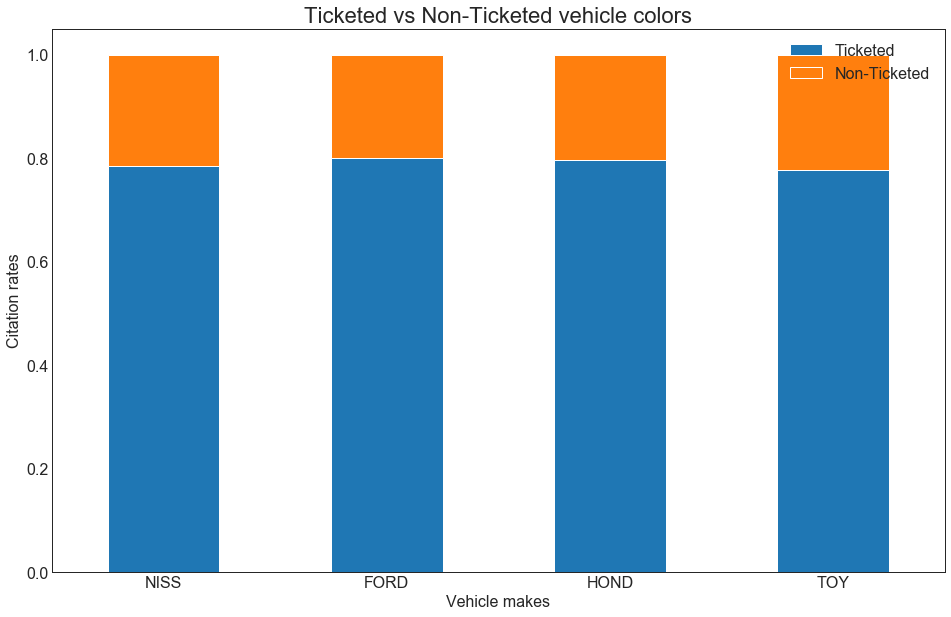

In [12]:
vz.color_plot(make_vis,
              categories=['NISS','FORD', 'HOND', 'TOY']),
#          output_image_name='Ticketed_vs_Non-Ticketed')

In [ ]:
len(make_vis)

In [ ]:
def color_plot(arr,categories=None, output_image_name=None):
    arr_list = np.asarray(arr).mean(axis=1)
    arr_lst = np.vstack((arr_list, 1-arr_list))
    print(len(arr_list))
    df = pd.DataFrame(arr_lst.T)
    df.plot(kind='bar',stacked=True)
#     sns.set(color_codes=True)
    plt.xlabel('Vehicle colors', fontsize=med)
    plt.ylabel('Citation rates', fontsize=med)
    plt.title('Ticketed vs Non-Ticketed vehicle colors')
    plt.xticks(np.arange(len(create_sample_dists(cleaned_data))),categories,rotation=0)#,

In [ ]:
color_plot(make_vis)


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df